## Final Project Submission

Please fill out:
* Student name: __Ngabu Caroline Wanja__
* Student pace: __Part Time__
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Microsoft Movie Business Entry Analysis


<img src="./Project-images/Movie-Poster.jfif" 
     align="left" 
     width="700" />

## Overview

This project explores data from the movie review databases IMDB, Rotten Tomatoes, Box Office Mojo, TheMovieDB and The Numbers to determine which movies are currently doing well at the box office. Exploratory data analysis will shed insight that can be used by Microsoft's new movie studio to determine the kind of original video content they should create. 

## Business Problem 

Microsoft plans on investing in the movie industry, which has attracted all the big companies. They have started by creating a new movie studio but they dont know anything about movie creation. The head of Microsoft's new movie studio needs to know which type of movies to invest in. Using data from movie review databases i explore the types of films that are currently doing well at the box office. The findings should be able to describe the types of films that are in demand and guide Microsoft movie studio towards the kind of original video content that will do well in the market. 

The business questions are:
1. Which types of movies are currently doing well at the box office
2. Which direction would you recommend that Microsoft Movie Studio take when investing in the movie industry in terms of the type of original video content to create

## Data Understanding 

I work with datasets derived from the movie review databases IMDB, Rotten Tomatoes, Box Office Mojo, TheMovieDB and The Numbers. These datasets contain information on films including film genre, runtime, domestic and worldwide grossing and rating among other variables. 


In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the Data Sets with Pandas

In [2]:
#Loading the data sets 
title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
title_crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
title_principals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
name_basics = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
title_akas = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t')

### Previewing all the Datasets

#### Title Basics Data from IMDB

In [3]:
#Viewing the first 5 rows
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
#Information on the data
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


The data has missing values in the columns: original_title, runtime_minutes and genres. The data type for the numeric columns values is formatted correctly but the year column can be formatted to datetime type.

#### Title Ratings Data from IMDB

In [5]:
#Reading the first 5 rows of the data
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [6]:
#Information on the data
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


The data types in the columns are in line with what is expected.

This data set does not have any missing values

#### Movie Budgets Data from The Numbers

In [7]:
#Previewing the first 5 rows
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [8]:
#Information on the data
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The data set does not have any missing values.

The columns, production_budget, domestic_gross and worldwide_gross are numeric. The data type needs formatting to the integer or float type to be useful for analysis. 

#### Movie Gross Data from Box Office Mojo

In [9]:
#Previewing the first 5 rows
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [10]:
#Information on the data
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


The data set has missing values in the studio, domestic gross and foreign gross columns. 

The column foreign_gross, has numeric data and needs to be formatted to the float type to be useful for analysis. 

#### Data on Movies from TheMovieDB

In [11]:
#Previewing the first 5 rows
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


As can be noted from loading the above column, the first column denotes the index. 
Loading the data without specifying the index column is giving 2 index columns.
We'll therefore reload the data using the first column as an index column

In [12]:
#reloading the data with the first column as the index column
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col=0)
tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [13]:
#Information on the data
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


The dataset does not have any missing values

The columns have the appropriate data types. The release_date column can however be converted to date time format for analysis

#### Title Crew Data from IMDB

In [14]:
#Previewing the data
title_crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [15]:
#Information on the data
title_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


The dataset has missing values in the directors and writers columns

The data type for the columns is appropriate. 

#### Title Principals Data from IMDB

In [16]:
#Previewing the first 5 rows
title_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [17]:
#Information on the data
title_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


The dataset has missing values in the job and characters columns.

The data types for the columns are appropriate. 

#### Name Basics Data from IMDB

In [18]:
#Previewing the first 5 rows
name_basics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [19]:
#Information on the data
name_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


The data set has missing values in the birth_year, death_year, primary_profession and known_for_titles columns.

The data in the columns birth_year and death_year can be formatted to date type 

#### Title AKAs Data from IMDB

In [20]:
#Previewing the first 5 rows
title_akas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [21]:
#Information on the data
title_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


The data set has missing values in the region, language, types, attributes and is_original_title columns.

The data types for the columns are appropriate. 

#### Movie Information Data from Rotten Tomatoes

In [22]:
#Previewing the first 5 rows
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [23]:
#Information on the data
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


The data set has missing values in all the columns except the index column. 

The column runtime needs editing to float type because it has numeric data

### Research Questions  

Based on the datasets above, I have derived the following research questions

1. How does the movie genre relate with movie rating? Which genres are highest rated and which genres are lowest rated?
2. Which types of films are the most expensive to produce and the cheapest to produce?
3. Which types of films have the highest domestic roi and worldwide roi and which ones have the lowest domestic and worldwide roi?
4. What is the relationship between production budget and return on investment?
5. What is the relationship between movie rating and return on investment?

To answer these questions, I will make use of the following datasets:

1. title_basics from IMDB
2. title_ratings from IMDB
3. movie_budget from TheNumbers
4. title_akas from IMDB



## Data Preparation

### Data Cleaning

#### Cleaning and merging the first 2 datasets title_basics and title_ratings

In [24]:
#checking for null values
title_basics.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [25]:
#Set index as the t_const column
new_title_basics = title_basics.set_index(['tconst'])
new_title_basics.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [26]:
#Drop the columns that we do not need for analysis (primary_title, original_title and start_year)
new_title_basics.drop(columns = ['primary_title', 'original_title', 'start_year'], inplace=True)
new_title_basics.head()

,runtime_minutes,genres
tconst,,
tt0063540,175.0,"Action,Crime,Drama"
tt0066787,114.0,"Biography,Drama"
tt0069049,122.0,Drama
tt0069204,NaN,"Comedy,Drama"
tt0100275,80.0,"Comedy,Drama,Fantasy"


In [27]:
#Check for duplicated entries
duplicateRows = new_title_basics[new_title_basics.duplicated()]
duplicateRows

,runtime_minutes,genres
tconst,,
tt0297400,NaN,"Crime,Drama"
tt0330811,NaN,NaN
tt0357717,NaN,Drama
tt0377981,84.0,"Adventure,Animation,Comedy"
tt0385887,NaN,"Crime,Drama"
...,...,...
tt9916538,123.0,Drama
tt9916622,NaN,Documentary
tt9916706,NaN,Comedy


In [28]:
#Shape before dropping duplicates
new_title_basics.shape

(146144, 2)

In [29]:
#Drop duplicated rows and check shape
new_title_basics = new_title_basics.drop_duplicates()
new_title_basics.shape

(21213, 2)

In [30]:
#Check columns formatting
new_title_basics.columns

Index(['runtime_minutes', 'genres'], dtype='object')

In [31]:
#Check for missing values
new_title_basics.isna().sum()

runtime_minutes    585
genres             158
dtype: int64


I have 5395 missing values under the column genre in this dataset. 
I'll drop the rows with the missing values since the data cannot be imputed accurately. 

In [32]:
#Drop the rows with missing values on the column genre
new_title_basics.dropna(subset=["genres"], inplace=True)
new_title_basics.isna().sum()

runtime_minutes    584
genres               0
dtype: int64

In [33]:
#Check for any other placeholders in the genres column
new_title_basics['genres'].value_counts()

Documentary                 283
Drama                       207
Documentary,Music           152
Comedy                      148
Documentary,History         145
                           ... 
Adventure,News                1
Fantasy,Musical,Mystery       1
Action,Family,Western         1
Adventure,Romance,Sci-Fi      1
Crime,History,Mystery         1
Name: genres, Length: 1085, dtype: int64

There seems to be no other placeholders in the genres column in this dataset

***
The next step will be to clean the title_ratings dataset so i can merge it with the title basics dataset

In [34]:
#Refresh on the dataset information
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


The title_ratings dataset does not have any missing values

In [35]:
#Set the index column as tconst to be able to merge with the same column in the previous dataset
new_title_ratings = title_ratings.set_index(['tconst'])
new_title_ratings.head()

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [36]:
#Check for duplicate entries
duplicateRows = new_title_ratings[new_title_ratings.duplicated()]
duplicateRows

,averagerating,numvotes
tconst,,
tt1555056,6.8,20
tt1665807,7.2,6
tt1671509,6.8,23
tt1676132,7.7,6
tt1700274,8.1,9
...,...,...
tt9805820,8.1,25
tt9844256,7.5,24
tt9851050,4.7,14


In [37]:
#Shape before dropping duplicates
new_title_ratings.shape

(73856, 2)

In [38]:
#Dropping the duplicate entries
new_title_ratings = new_title_ratings.drop_duplicates()
new_title_ratings.shape

(28782, 2)

In [39]:
#Check the column names formating 
new_title_ratings.columns

Index(['averagerating', 'numvotes'], dtype='object')

#### Merging the cleaned title_basics and title_ratings datasets

In [40]:
tbasics_and_ratings = new_title_basics.join(new_title_ratings, how="inner")
tbasics_and_ratings.head()

,runtime_minutes,genres,averagerating,numvotes
tconst,,,,
tt0066787,114.0,"Biography,Drama",7.2,43
tt0069049,122.0,Drama,6.9,4517
tt0069204,NaN,"Comedy,Drama",6.1,13
tt0100275,80.0,"Comedy,Drama,Fantasy",6.5,119
tt0137204,83.0,"Adventure,Animation,Comedy",8.1,263


In [41]:
tbasics_and_ratings.shape

(6745, 4)

#### Cleaning and merging the second 2 datasets movie_budgets and title_akas

I'll start by cleaning the movie_budgets dataset and then merge it with title akas to be able to retrieve movies tconst ids. 

In [42]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The movie_budget data set does not have any missing values. I'll proceed to check for any placeholders in further cleaning. 

The columns production_budget, domestic_gross and worldwide_gross are numeric. Their data type needs to be stripped of the $ sign and commas and converted to integer type. 

In [43]:
#Dropping the columns we do not need for analysis
new_movie_budget = movie_budget.drop(columns = ['id', 'release_date'])
new_movie_budget.head()

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [44]:
#Checking for duplicated rows
duplicateRows = new_movie_budget[new_movie_budget.duplicated()]
duplicateRows

,movie,production_budget,domestic_gross,worldwide_gross


There are no duplicated entries on the movie_budgets dataset

In [45]:
#Checking for placeholders on the movie column
new_movie_budget['movie']. value_counts()

King Kong                                3
Halloween                                3
Home                                     3
Footloose                                2
The Karate Kid                           2
                                        ..
A Walk in the Woods                      1
High Plains Drifter                      1
The Hunger Games: Mockingjay - Part 2    1
Urban Legend                             1
Jade                                     1
Name: movie, Length: 5698, dtype: int64

In [46]:
#Cleaning the production_budget, domestic_gross and worldwide_gross columns
new_movie_budget['production_budget'] = new_movie_budget['production_budget'].str.replace(',', '').str.replace('\$','', regex = True)
new_movie_budget['domestic_gross'] = new_movie_budget['domestic_gross'].str.replace(',', '').str.replace('\$','', regex = True)
new_movie_budget['worldwide_gross'] = new_movie_budget['worldwide_gross'].str.replace(',', '').str.replace('\$','', regex = True)

In [47]:
print(new_movie_budget.dtypes)

movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object


In [48]:
#Converting the data type of numeric columns to integer type
new_movie_budget['production_budget'] = new_movie_budget['production_budget'].astype('int64')
new_movie_budget['domestic_gross'] = new_movie_budget['domestic_gross'].astype('int64')
new_movie_budget['worldwide_gross'] = new_movie_budget['worldwide_gross'].astype('int64')

In [49]:
print(new_movie_budget.dtypes)

movie                object
production_budget     int64
domestic_gross        int64
worldwide_gross       int64
dtype: object


In [50]:
new_movie_budget.describe()

,production_budget,domestic_gross,worldwide_gross
count,5.782000e+03,5.782000e+03,5.782000e+03
mean,3.158776e+07,4.187333e+07,9.148746e+07
std,4.181208e+07,6.824060e+07,1.747200e+08
min,1.100000e+03,0.000000e+00,0.000000e+00
25%,5.000000e+06,1.429534e+06,4.125415e+06
50%,1.700000e+07,1.722594e+07,2.798445e+07
75%,4.000000e+07,5.234866e+07,9.764584e+07
max,4.250000e+08,9.366622e+08,2.776345e+09


The numeric columns domestic gross and worldwide gross seem to be having some zeros therein. 

In [51]:
#Investigating the rows with zero values
new_movie_budget.loc[~(new_movie_budget==0).all(axis=1)]

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,425000000,760507625,2776345279
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,Dark Phoenix,350000000,42762350,149762350
3,Avengers: Age of Ultron,330600000,459005868,1403013963
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...
5777,Red 11,7000,0,0
5778,Following,6000,48482,240495
5779,Return to the Land of Wonders,5000,1338,1338
5780,A Plague So Pleasant,1400,0,0


I will drop the rows with zero values. This is because there are huge differences between the minimum and maximum values and therefore it is impossible to impute the missing values accurately using mean or median. 

In [52]:
#Dropping the rows with zero values
new_movie_budget = new_movie_budget.loc[(new_movie_budget!=0).all(axis=1)]
new_movie_budget.shape

(5234, 4)

I will now clean the title akas dataset to be able to merge it with movie_budget database. 

In [53]:
 title_akas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [54]:
new_title_akas = title_akas.drop(columns = ['ordering', 'region', 'language', 'types', 'attributes', 'is_original_title'])
new_title_akas.head()

,title_id,title
0,tt0369610,Джурасик свят
1,tt0369610,Jurashikku warudo
2,tt0369610,Jurassic World: O Mundo dos Dinossauros
3,tt0369610,O Mundo dos Dinossauros
4,tt0369610,Jurassic World


In [55]:
#Checking for missing values in our dataset
new_title_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   title_id  331703 non-null  object
 1   title     331703 non-null  object
dtypes: object(2)
memory usage: 5.1+ MB


In [56]:
#Checking for placeholders
new_title_akas['title'].value_counts()

Robin Hood                                         32
Home                                               30
Alone                                              27
Love                                               25
Broken                                             25
                                                   ..
Mapang-akit                                         1
National Theatre Live: A Streetcar Named Desire     1
Банкир: Повелитель вселенной                        1
His Mother's Eyes                                   1
Кровь моей крови                                    1
Name: title, Length: 252781, dtype: int64

In [57]:
#Renaming the title column to movies to be able to relate it with the movie_budget dataset that we want to join it with
new_title_akas.rename(columns={'title': 'movie'}, inplace=True)
new_title_akas.head(2)

,title_id,movie
0,tt0369610,Джурасик свят
1,tt0369610,Jurashikku warudo


In [58]:
#Set the index columns for the datasets new_movie_budget and new_title_akas as movie then join them with an inner join
budgets_and_akas = new_movie_budget.set_index("movie").join(new_title_akas.set_index("movie"), how="inner")
budgets_and_akas.head()

,production_budget,domestic_gross,worldwide_gross,title_id
movie,,,,
10 Cloverfield Lane,5000000,72082999,108286422,tt1179933
10 Cloverfield Lane,5000000,72082999,108286422,tt1179933
10 Cloverfield Lane,5000000,72082999,108286422,tt1179933
10 Cloverfield Lane,5000000,72082999,108286422,tt1179933
10 Cloverfield Lane,5000000,72082999,108286422,tt1179933


In [59]:
duplicateRows = budgets_and_akas[budgets_and_akas.duplicated()]
duplicateRows

,production_budget,domestic_gross,worldwide_gross,title_id
movie,,,,
10 Cloverfield Lane,5000000,72082999,108286422,tt1179933
10 Cloverfield Lane,5000000,72082999,108286422,tt1179933
10 Cloverfield Lane,5000000,72082999,108286422,tt1179933
10 Cloverfield Lane,5000000,72082999,108286422,tt1179933
10 Days in a Madhouse,12000000,14616,14616,tt3453052
...,...,...,...,...
Zootopia,150000000,341268248,1019429616,tt2948356
Zootopia,150000000,341268248,1019429616,tt2948356
xXx: Return of Xander Cage,85000000,44898413,345033359,tt1293847


In [60]:
clean_budgets_and_akas = budgets_and_akas.drop_duplicates()
clean_budgets_and_akas.shape

(3538, 4)

In [61]:
clean_budgets_and_akas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3538 entries, 10 Cloverfield Lane to xXx: Return of Xander Cage
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   production_budget  3538 non-null   int64 
 1   domestic_gross     3538 non-null   int64 
 2   worldwide_gross    3538 non-null   int64 
 3   title_id           3538 non-null   object
dtypes: int64(3), object(1)
memory usage: 138.2+ KB


In [62]:
#Previewing the statistics of the data in the numeric columns#
clean_budgets_and_akas.describe()

,production_budget,domestic_gross,worldwide_gross
count,3.538000e+03,3.538000e+03,3.538000e+03
mean,3.656884e+07,4.611819e+07,1.078938e+08
std,4.607772e+07,7.296969e+07,1.967019e+08
min,9.000000e+03,3.880000e+02,5.270000e+02
25%,7.000000e+06,3.395391e+06,8.411738e+06
50%,2.000000e+07,2.251214e+07,4.065186e+07
75%,4.600000e+07,5.501173e+07,1.088456e+08
max,4.250000e+08,7.605076e+08,2.776345e+09


In [63]:
#Checking for any rows with zero values in the numeric columns
clean_budgets_and_akas.loc[~(clean_budgets_and_akas==0).all(axis=1)]

,production_budget,domestic_gross,worldwide_gross,title_id
movie,,,,
10 Cloverfield Lane,5000000,72082999,108286422,tt1179933
10 Days in a Madhouse,12000000,14616,14616,tt3453052
12 Rounds,20000000,12234694,17306648,tt3517850
12 Strong,35000000,45819713,71118378,tt1413492
12 Years a Slave,20000000,56671993,181025343,tt2024544
...,...,...,...,...
Zoom,35000000,11989328,12506188,tt6667868
Zoom,35000000,11989328,12506188,tt6117454
Zoom,35000000,11989328,12506188,tt3763866


### Merging the selected datasets for analysis
In this step, i will merge the previosuly cleaned dataset new_tbasics_and_ratings, with the clean_budgets_and_akas dataset to get a dataset that i with movie titles, ratings and movie budgets that i can use to answer my analysis questions. 

In [69]:
#Rename the tconst column in new_tbasics_and_ratings to movie_id
tbasics_and_ratings.index.names = ['movie_id']
tbasics_and_ratings

,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,
tt0066787,114.0,"Biography,Drama",7.2,43
tt0069049,122.0,Drama,6.9,4517
tt0069204,NaN,"Comedy,Drama",6.1,13
tt0100275,80.0,"Comedy,Drama,Fantasy",6.5,119
tt0137204,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...
tt9793334,135.0,"Mystery,Thriller",7.3,423
tt9799984,145.0,"Action,Romance,Thriller",7.8,198
tt9806304,100.0,"Comedy,Crime,Music",2.2,35


In [70]:
#Rename the title_id column in clean_budgets_and_akas to movie_id
clean_budgets_and_akas.rename(columns={'title_id': 'movie_id'}, inplace=True)
clean_budgets_and_akas.head(2)

C:\Users\Carol\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,production_budget,domestic_gross,worldwide_gross,movie_id
movie,,,,
10 Cloverfield Lane,5000000,72082999,108286422,tt1179933
10 Days in a Madhouse,12000000,14616,14616,tt3453052


In [71]:
#Merging the two datasets
microsoft_analysis_df = tbasics_and_ratings.join(clean_budgets_and_akas.set_index("movie_id"), how="inner")
microsoft_analysis_df.head()

,runtime_minutes,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross
movie_id,,,,,,,
tt0137204,83.0,"Adventure,Animation,Comedy",8.1,263,4000000,12178602,27786849
tt0337692,124.0,"Adventure,Drama,Romance",6.1,37886,25000000,720828,9313302
tt0339736,98.0,Horror,5.6,2420,3300000,13092006,38969037
tt0359950,114.0,"Adventure,Comedy,Drama",7.3,275300,91000000,58236838,187861183
tt0365907,114.0,"Action,Crime,Drama",6.5,105116,28000000,26017685,62108587


## Feature Engineering
I create 3 new features: domestic_roi, worldwide_roi and average_roi which is an average of the domestic_roi and worldwide_roi columns, to analyze the profitability of the various movies based on production_budget, domestic_gross and worldwide_gross columns

In [72]:
#Calculating the domestic return on investment from domestic gross
microsoft_analysis_df['domestic_roi'] = (((microsoft_analysis_df['domestic_gross'] - microsoft_analysis_df['production_budget'])/ (microsoft_analysis_df['production_budget'])) * 100)
microsoft_analysis_df.head()

,runtime_minutes,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,domestic_roi
movie_id,,,,,,,,
tt0137204,83.0,"Adventure,Animation,Comedy",8.1,263,4000000,12178602,27786849,204.465050
tt0337692,124.0,"Adventure,Drama,Romance",6.1,37886,25000000,720828,9313302,-97.116688
tt0339736,98.0,Horror,5.6,2420,3300000,13092006,38969037,296.727455
tt0359950,114.0,"Adventure,Comedy,Drama",7.3,275300,91000000,58236838,187861183,-36.003475
tt0365907,114.0,"Action,Crime,Drama",6.5,105116,28000000,26017685,62108587,-7.079696


In [73]:
#Calculating the worldwide return on investment from worldwide gross
microsoft_analysis_df['worldwide_roi'] = (((microsoft_analysis_df['worldwide_gross'] - microsoft_analysis_df['production_budget'])/ (microsoft_analysis_df['production_budget'])) * 100)
microsoft_analysis_df.head()

,runtime_minutes,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,domestic_roi,worldwide_roi
movie_id,,,,,,,,,
tt0137204,83.0,"Adventure,Animation,Comedy",8.1,263,4000000,12178602,27786849,204.465050,594.671225
tt0337692,124.0,"Adventure,Drama,Romance",6.1,37886,25000000,720828,9313302,-97.116688,-62.746792
tt0339736,98.0,Horror,5.6,2420,3300000,13092006,38969037,296.727455,1080.879909
tt0359950,114.0,"Adventure,Comedy,Drama",7.3,275300,91000000,58236838,187861183,-36.003475,106.440860
tt0365907,114.0,"Action,Crime,Drama",6.5,105116,28000000,26017685,62108587,-7.079696,121.816382


In [74]:
#Calculating the average return on investment from domestic roi and worldwide roi
microsoft_analysis_df['average_roi'] = (microsoft_analysis_df['domestic_roi'] + microsoft_analysis_df['worldwide_roi']) / 2
microsoft_analysis_df.head()

,runtime_minutes,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,domestic_roi,worldwide_roi,average_roi
movie_id,,,,,,,,,,
tt0137204,83.0,"Adventure,Animation,Comedy",8.1,263,4000000,12178602,27786849,204.465050,594.671225,399.568138
tt0337692,124.0,"Adventure,Drama,Romance",6.1,37886,25000000,720828,9313302,-97.116688,-62.746792,-79.931740
tt0339736,98.0,Horror,5.6,2420,3300000,13092006,38969037,296.727455,1080.879909,688.803682
tt0359950,114.0,"Adventure,Comedy,Drama",7.3,275300,91000000,58236838,187861183,-36.003475,106.440860,35.218693
tt0365907,114.0,"Action,Crime,Drama",6.5,105116,28000000,26017685,62108587,-7.079696,121.816382,57.368343


In [75]:
microsoft_analysis_df.describe()

,runtime_minutes,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,domestic_roi,worldwide_roi,average_roi
count,962.000000,962.000000,9.620000e+02,9.620000e+02,9.620000e+02,9.620000e+02,962.000000,962.000000,962.000000
mean,113.721414,6.410187,1.289557e+05,5.224528e+07,6.484567e+07,1.625916e+08,103.764843,309.013217,206.389030
std,20.123586,1.054153,1.801351e+05,5.827882e+07,9.115421e+07,2.488199e+08,602.973424,1042.993283,814.805712
min,41.000000,1.600000,9.000000e+00,2.500000e+04,9.180000e+02,2.436000e+03,-99.996940,-99.878200,-99.878200
25%,100.250000,5.900000,1.418325e+04,1.300000e+07,8.139303e+06,1.760456e+07,-60.593846,-0.124426,-27.599254
50%,110.000000,6.500000,6.993900e+04,3.000000e+07,3.463644e+07,7.264252e+07,-7.417127,118.047159,57.330683
75%,124.000000,7.100000,1.626272e+05,6.975000e+07,7.804283e+07,1.884585e+08,90.745239,301.910014,197.772928
max,217.000000,8.800000,1.841066e+06,4.106000e+08,7.000596e+08,2.048134e+09,14361.538462,21438.461538,17900.000000


## Analysis

#### 1. The Relationship between movie genre and average rating

To answer this question, i will use the new_tbasics_and_ratings dataset.
I'll drop the numvotes column since i will not be requiring them for this step.

In [76]:
new_tbasics_and_ratings = tbasics_and_ratings.drop(columns = ['numvotes'])
new_tbasics_and_ratings.head()

,runtime_minutes,genres,averagerating
movie_id,,,
tt0066787,114.0,"Biography,Drama",7.2
tt0069049,122.0,Drama,6.9
tt0069204,NaN,"Comedy,Drama",6.1
tt0100275,80.0,"Comedy,Drama,Fantasy",6.5
tt0137204,83.0,"Adventure,Animation,Comedy",8.1


array([[<AxesSubplot:title={'center':'averagerating'}>]], dtype=object)

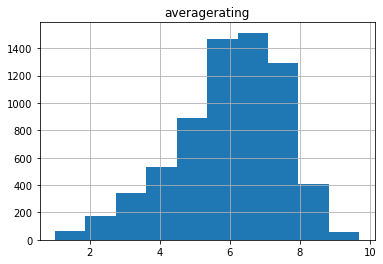

In [77]:
new_tbasics_and_ratings[['genres', 'averagerating']].hist()

The histogram shows a somewhat normal distribution with a little bit of skewing to the right. 

In [78]:
#Grouping the data by unique genre sets and the mean of the ratings
grouped_new_tbasics_and_ratings = new_tbasics_and_ratings.groupby('genres').mean('averagerating')
grouped_new_tbasics_and_ratings.head()

,runtime_minutes,averagerating
genres,,
Action,121.062500,5.503125
"Action,Adult,Comedy",NaN,3.400000
"Action,Adventure",110.379310,5.037931
"Action,Adventure,Animation",91.625000,6.517500
"Action,Adventure,Biography",125.555556,6.833333


In [79]:
#Sorting the values
grouped_new_tbasics_and_ratings.sort_values(by=['averagerating'], ascending=False, inplace=True)
grouped_new_tbasics_and_ratings.head()

,runtime_minutes,averagerating
genres,,
"Documentary,Family,Romance",10.0,9.7
"Documentary,Family,Musical",59.0,9.3
"Adventure,Documentary,Western",77.0,9.2
"Action,Documentary,Family",66.0,9.2
"Adventure,Drama,War",90.0,8.9


In [80]:
high_rated = grouped_new_tbasics_and_ratings.iloc[:10]
plot_high_rated = high_rated.reset_index()

In [81]:
low_rated = grouped_new_tbasics_and_ratings.iloc[-10:]
plot_low_rated = low_rated.reset_index()

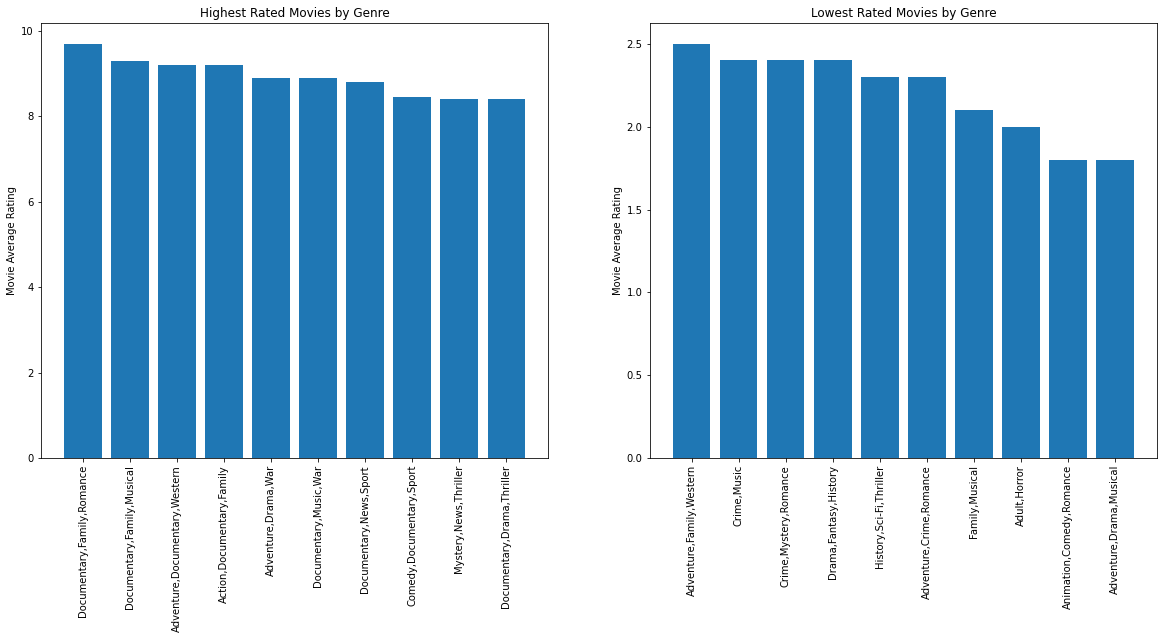

In [127]:
#Setting up the plot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 8))

ax1.bar(
    x=plot_high_rated["genres"], height=plot_high_rated["averagerating"]
)
ax2.bar(x=plot_low_rated["genres"], height=plot_low_rated["averagerating"])

ax1.tick_params(axis="x", labelrotation=90)
ax2.tick_params(axis="x", labelrotation=90)
ax1.set_ylabel("Movie Average Rating")
ax2.set_ylabel("Movie Average Rating")
ax1.set_title("Highest Rated Movies by Genre")
ax2.set_title("Lowest Rated Movies by Genre");

plt.savefig("./Project-images/movierating.png", dpi=150)

***
The highest rated movies type is documentary/family/romance, followed closely by documentary/family/musical, adventure/documentary/western and action/documentary/family. 
The genre documentary is very popular and appears in the 8 out of 10 times in the first 10 highest rated movie genre sets. 

The lowest rated movie type is adventure/drama/musical. Other low rated film types include animation/comedy/romance, adult/horror and family/musical. 
There is no recurrent type in the 10 lowest rated movie genres. 

#### 2. Which types of films are the most expensive to produce and the cheapest to produce?

In [86]:
#Dropping the columns we do not need to answer this question
grouped_2_df = microsoft_analysis_df.drop(columns = ['runtime_minutes','numvotes', 'averagerating', 'domestic_gross', 'worldwide_gross', 'domestic_roi', 'worldwide_roi', 'average_roi'])
grouped_2_df.head()


,genres,production_budget
movie_id,,
tt0137204,"Adventure,Animation,Comedy",4000000
tt0337692,"Adventure,Drama,Romance",25000000
tt0339736,Horror,3300000
tt0359950,"Adventure,Comedy,Drama",91000000
tt0365907,"Action,Crime,Drama",28000000


In [87]:
#Grouping by the movie genre
grouped_2_df = grouped_2_df.groupby('genres').mean('production_budget')

In [88]:
grouped_2_df.sort_values(by=['production_budget'], ascending=False, inplace=True)
grouped_2_df.head()

,production_budget
genres,
"Adventure,Fantasy",2.316667e+08
"Action,Adventure,Sci-Fi",1.734200e+08
"Adventure,Drama,Sci-Fi",1.650000e+08
"Adventure,Drama,Sport",1.500000e+08
"Fantasy,Romance",1.500000e+08


In [89]:
expensive = grouped_2_df.iloc[:10]
plot_expensive = expensive.reset_index()

In [90]:
cheap = grouped_2_df.iloc[-10:]
plot_cheap = cheap.reset_index()

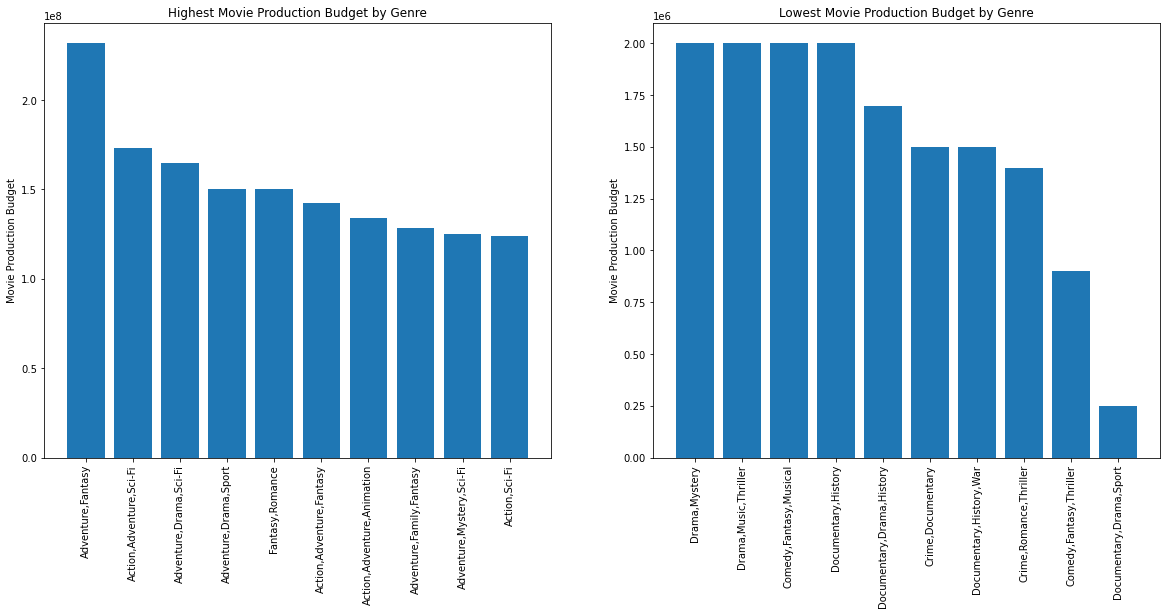

In [128]:
#Setting up the plot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 8))

ax1.bar(
    x=plot_expensive["genres"], height=plot_expensive["production_budget"]
)
ax2.bar(x=plot_cheap["genres"], height=plot_cheap["production_budget"])

ax1.tick_params(axis="x", labelrotation=90)
ax2.tick_params(axis="x", labelrotation=90)
ax1.set_ylabel("Movie Production Budget")
ax2.set_ylabel("Movie Production Budget")
ax1.set_title("Highest Movie Production Budget by Genre")
ax2.set_title("Lowest Movie Production Budget by Genre");

plt.savefig("./Project-images/budget-genre.png", dpi=150)

***
The film genres with the highest movie budgets are: adventure/fantasy, action/adventure/sci-fi and adventure/drama/sci-fi.
In the top 10 movie genres with the highest budgets, adventure appears 8 times. 

The film genres with the lowest movie budgets are documentary/drama/sport, comedy/fantasy/thriller and crime/romance/thriller. 
In the 10 movies with the lowest budget, documentary has the highest frequency appearing 5 times followed by drama at 4 times. 

#### 3. Which types of films have the highest domestic roi and worldwide roi and which ones have the lowest domestic and worldwide roi?
#### a. Types of Films with the Highest and Lowest Domestic Return on Investment

In [95]:
#Grouping by the movie genre
grouped_3a_df = microsoft_analysis_df.drop(columns = ['runtime_minutes','numvotes','averagerating', 'domestic_gross', 'worldwide_gross', 'production_budget', 'worldwide_roi', 'average_roi'])
grouped_3a_df.head()


,genres,domestic_roi
movie_id,,
tt0137204,"Adventure,Animation,Comedy",204.465050
tt0337692,"Adventure,Drama,Romance",-97.116688
tt0339736,Horror,296.727455
tt0359950,"Adventure,Comedy,Drama",-36.003475
tt0365907,"Action,Crime,Drama",-7.079696


In [96]:
#Dropping the columns that we do not need for the analysis
grouped_3a_df = grouped_3a_df.groupby('genres').mean('domestic_roi')

In [97]:
#Sorting the values in order
grouped_3a_df.sort_values(by=['domestic_roi'], ascending=False, inplace=True)
grouped_3a_df.head()

,domestic_roi
genres,
"Action,Comedy,History",4994.371026
"Adventure,Drama,Horror",2979.844837
"Horror,Thriller",1661.625607
"Drama,Family,Fantasy",1471.386375
"Family,Fantasy,Musical",997.647592


In [98]:
highest_roi = grouped_3a_df.iloc[:10]
plot_highest_roi = highest_roi.reset_index()

In [99]:
lowest_roi = grouped_3a_df.iloc[-10:]
plot_lowest_roi = lowest_roi.reset_index()

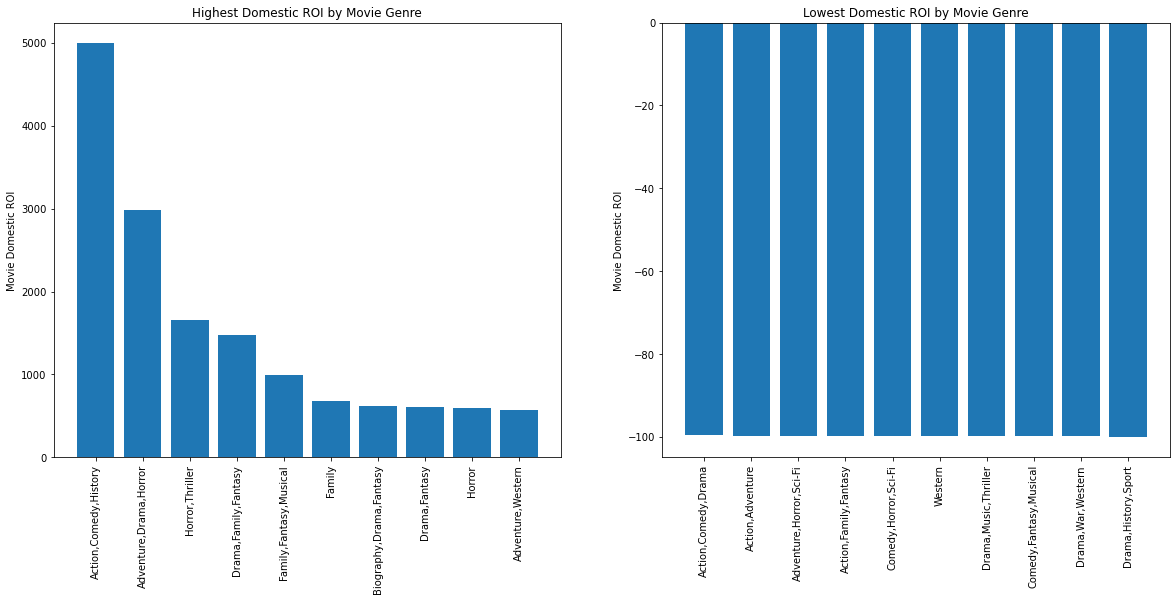

In [129]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 8))

ax1.bar(
    x=plot_highest_roi["genres"], height=plot_highest_roi["domestic_roi"]
)
ax2.bar(x=plot_lowest_roi["genres"], height=plot_lowest_roi["domestic_roi"])

ax1.tick_params(axis="x", labelrotation=90)
ax2.tick_params(axis="x", labelrotation=90)
ax1.set_ylabel("Movie Domestic ROI")
ax2.set_ylabel("Movie Domestic ROI")
ax1.set_title("Highest Domestic ROI by Movie Genre")
ax2.set_title("Lowest Domestic ROI by Movie Genre");

plt.savefig("./Project-images/droi-genre.png", dpi=150)

Domestically, the film genres action/comedy/history have the highest return on investment. 
They are trailed by adventure/drama,horror, horror/thriller and drama/family/fantasy. 
The recurrent genres in the top 10 highest grossing films domestically are fantasy and drama

The bottom 10 movie genres have a negative return on investment ranging around -99% with all of them making returning less than half of the production costs.
The lowest three genres are drama/history/sport, drama/war/western and comedy/fantasy/musical. 
Once again drama is a recurrent genre in the loss making film types. 

#### b. Types of Films with the Highest and Lowest Worldwide Return on Investment

In [107]:
#Dropping the columns that we do not need for the analysis
grouped_3b_df = microsoft_analysis_df.drop(columns = ['runtime_minutes', 'numvotes', 'averagerating', 'domestic_gross', 'worldwide_gross', 'production_budget', 'domestic_roi', 'average_roi'])
grouped_3b_df.head()

,genres,worldwide_roi
movie_id,,
tt0137204,"Adventure,Animation,Comedy",594.671225
tt0337692,"Adventure,Drama,Romance",-62.746792
tt0339736,Horror,1080.879909
tt0359950,"Adventure,Comedy,Drama",106.440860
tt0365907,"Action,Crime,Drama",121.816382


In [108]:
grouped_3b_df = grouped_3b_df.groupby('genres').mean('worldwide_roi')

In [109]:
grouped_3b_df.sort_values(by=['worldwide_roi'], ascending=False, inplace=True)
grouped_3b_df.head()

,worldwide_roi
genres,
"Action,Comedy,History",9913.466462
"Adventure,Drama,Horror",5491.019477
"Drama,Family,Fantasy",4726.022386
"Horror,Thriller",2650.173290
"Family,Fantasy,Musical",1814.577738


In [110]:
high_b_roi = grouped_3b_df.iloc[:10]
plot_high_b_roi = high_b_roi.reset_index()

In [111]:
low_b_roi = grouped_3b_df.iloc[-10:]
plot_low_b_roi = low_b_roi.reset_index()

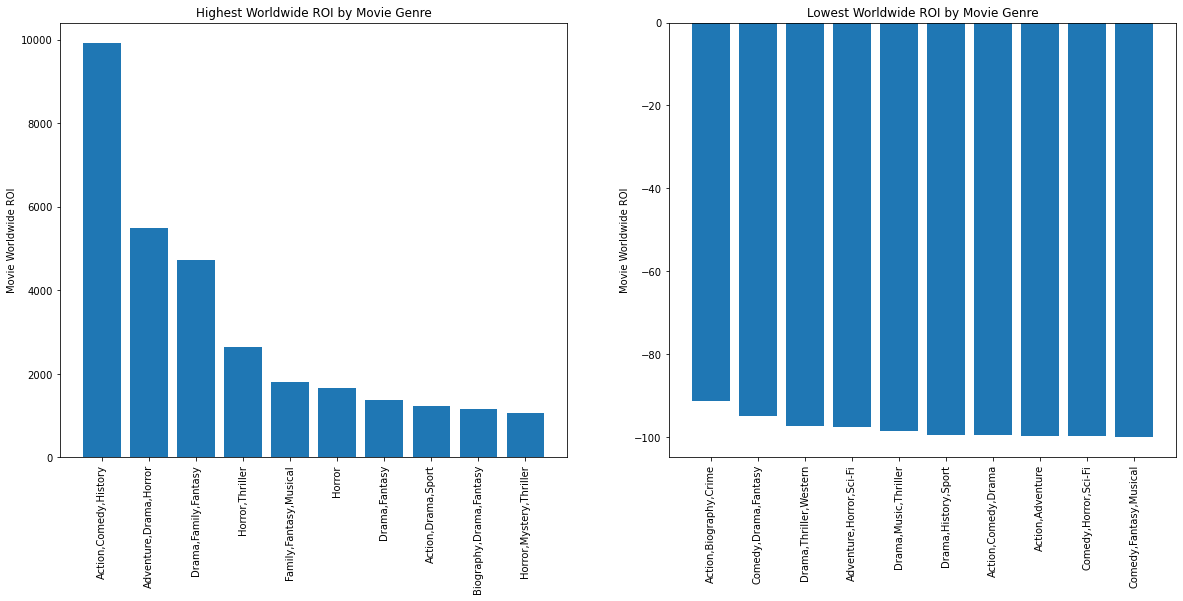

In [130]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 8))

ax1.bar(
    x=plot_high_b_roi["genres"], height=plot_high_b_roi["worldwide_roi"]
)
ax2.bar(x=plot_low_b_roi["genres"], height=plot_low_b_roi["worldwide_roi"])

ax1.tick_params(axis="x", labelrotation=90)
ax2.tick_params(axis="x", labelrotation=90)
ax1.set_ylabel("Movie Worldwide ROI")
ax2.set_ylabel("Movie Worldwide ROI")
ax1.set_title("Highest Worldwide ROI by Movie Genre")
ax2.set_title("Lowest Worldwide ROI by Movie Genre");

plt.savefig("./Project-images/wroi-genre.png", dpi=150)

Worldwide, action/comedy/history film genre still leads in terms of grossing, with the highest return on investment of about 10,000%. 
It is trailed by adventure/drama,horror, drama/family/fantasy and horror/thriller. 
Drama is a recurrent genres in the top 10 highest grossing films worldwide, appearing 5 times.

The bottom 10 movie genres worldwide also have a negative return on investment ranging from -90% to -99%. 
The lowest three genres worlwide in terms of return on investment are comedy/fantasy/musical, comedy/horror/sci-fi and action/adventure. Drama yet again is a recurrent genre in this category appearing 5 times.

#### 4. What is the relationship between production budget and return on investment?

I will use a scatter plot to investigate the relationship between movie production budget and return on investment

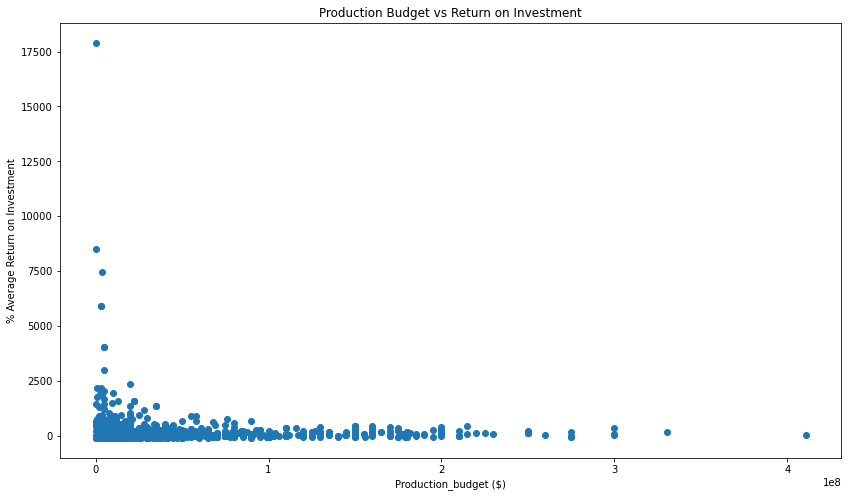

In [126]:
#Scatter plot without grouping by genre
fig, ax = plt.subplots(figsize=(14, 8))

ax.scatter(
    x=microsoft_analysis_df["production_budget"], y=microsoft_analysis_df["average_roi"]
)

ax.set_xlabel("Production_budget ($)")
ax.set_ylabel("% Average Return on Investment")
ax.set_title("Production Budget vs Return on Investment");

In [114]:
#Scatter plot while grouping by genre
grouped_4_df = microsoft_analysis_df.groupby('genres').agg({'production_budget':'mean', 'average_roi':'mean'})
grouped_4_df

,production_budget,average_roi
genres,,
Action,9.000000e+06,180.827256
"Action,Adventure",4.500000e+06,-99.738356
"Action,Adventure,Animation",1.341429e+08,165.065251
"Action,Adventure,Biography",1.000000e+08,75.477344
"Action,Adventure,Comedy",1.032353e+08,174.939818
...,...,...
"Romance,Sci-Fi",1.100000e+08,339.905172
"Romance,Sci-Fi,Thriller",5.020000e+07,88.672281
"Sci-Fi,Thriller",4.166667e+07,-20.674104


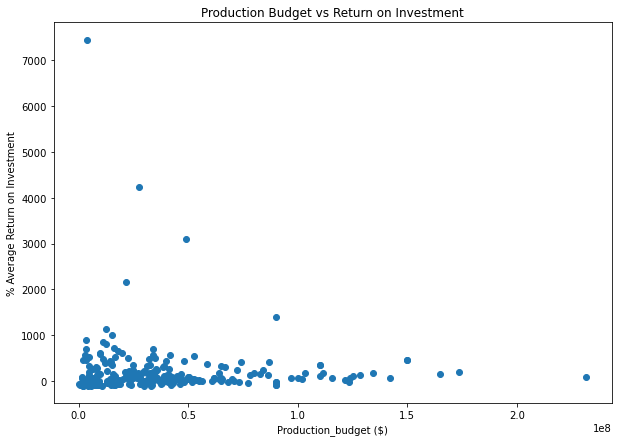

In [131]:
#Plotting the scatter plot
fig, ax = plt.subplots(figsize=(10, 7))

ax.scatter(
    x=grouped_4_df["production_budget"], y=grouped_4_df["average_roi"]
)

ax.set_xlabel("Production_budget ($)")
ax.set_ylabel("% Average Return on Investment")
ax.set_title("Production Budget vs Return on Investment");

plt.savefig("./Project-images/budget-roi.png", dpi=150)

***
Both scatter plots while grouping by genre and without grouping by genre do not show any relationship between production budget and return on investment

#### 5. What is the relationship between movie rating and return on investment?

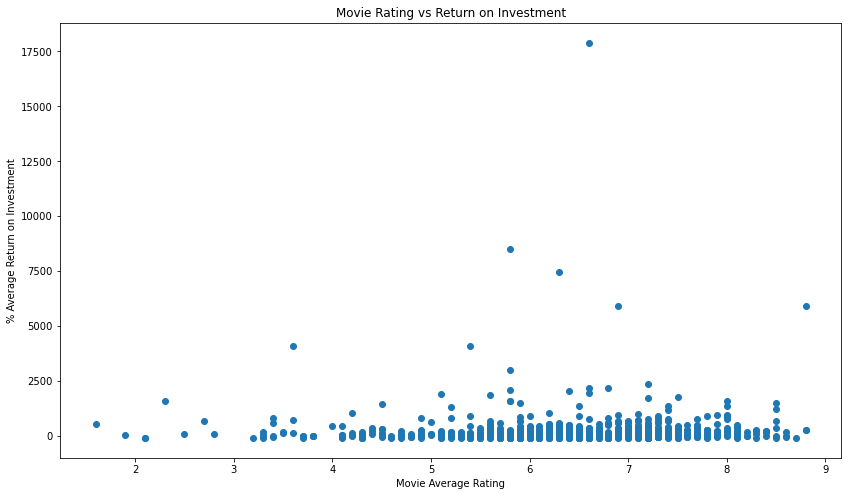

In [124]:
#Scatter plot without grouping by genre
fig, ax = plt.subplots(figsize=(14, 8))

ax.scatter(
    x=microsoft_analysis_df["averagerating"], y=microsoft_analysis_df["average_roi"]
)

ax.set_xlabel("Movie Average Rating")
ax.set_ylabel("% Average Return on Investment")
ax.set_title("Movie Rating vs Return on Investment");

In [117]:
#Scatter plot while grouping by genre 
grouped_5_df = microsoft_analysis_df.groupby('genres').agg({'averagerating':'mean', 'average_roi':'mean'})
grouped_5_df

,averagerating,average_roi
genres,,
Action,7.100000,180.827256
"Action,Adventure",5.800000,-99.738356
"Action,Adventure,Animation",7.171429,165.065251
"Action,Adventure,Biography",7.333333,75.477344
"Action,Adventure,Comedy",6.435294,174.939818
...,...,...
"Romance,Sci-Fi",5.500000,339.905172
"Romance,Sci-Fi,Thriller",7.100000,88.672281
"Sci-Fi,Thriller",4.800000,-20.674104


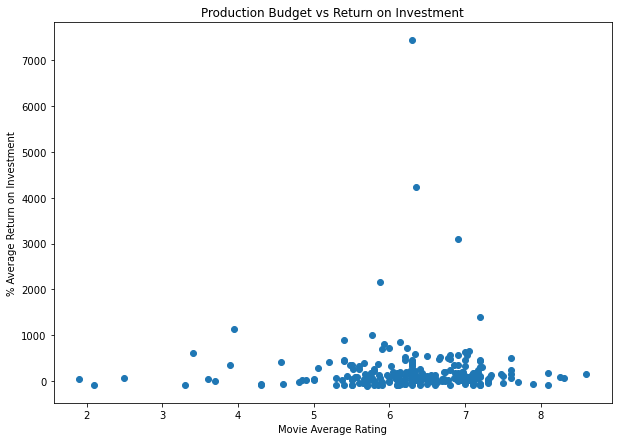

In [132]:
#Plotting the scatter plot
fig, ax = plt.subplots(figsize=(10, 7))

ax.scatter(
    x=grouped_5_df["averagerating"], y=grouped_5_df["average_roi"]
)

ax.set_xlabel("Movie Average Rating")
ax.set_ylabel("% Average Return on Investment")
ax.set_title("Production Budget vs Return on Investment");

plt.savefig("./Project-images/rating-roi.png", dpi=150)

Both scatter plots while grouping by genre and without grouping by genre do not show any relationship between average rating of movies and return on investment

## Conclusion
This analysis leads to the following recommendations to the head of Microsoft's new Movie Studio in terms of the types of films to create:

1. __Starting with films of the genre documentary is a good move.__ Documentary genre films rank well in terms of ratings. They are also among the film types with the lowest production budgets. This would be a good genre for a new studio to test the waters on. Microsoft's movie studio can also incorporate family themes in their new film types. Family genre films are also well rated and together with documentary, they form the top three highest rated films. High ratings will be good for a new movie studio as it will popularize them in most review databases.  
2. __Action and adventure are another genre that Microsoft's new studio can look into.__ Action genre films combined with comedy and history have the highest return on investment both domestically and worldwide. Notably, action genre films are among the film types with the highest production costs in terms of pairing 
3. __Drama and comedy genre films must be approached with caution.__ These film genres are recurring in both the highest and the lowest grossing film types, domestically and worldwide. Should you want to invest here, you must conduct further market analysis to determine what separates a top grossing drama or comedy film from a loss making one that does not even recoup half of its production costs.
4. __Rating and production budgets are not indicators of return on investment.__ Higher rating and higher production budget will not necessarily result in a top grossing film. 


## Further Analysis
Further analysis can be conducted to determine:
1. The predictors of a film's return on investments
2. The effect of director/writer on a film's rating and popularity
3. The effect or runtime in minutes on a movie's rating and return on investment. 